# Analisis de datos con scipy y statsmodels

## Objetivo
Proporcionar una comprensión integral de las técnicas de análisis estadístico utilizando SciPy y Statsmodels en Python, aplicadas a la ciencia de datos.

### Objetivos específicos:
* Entender la utilidad y aplicación de las pruebas estadísiticas
* Aplicar pruebas estadísticas para inferencia utilizando Scipy y Statsmodels.
* Interpretar los resultados de los análisis estadísticos en el contexto de la ciencia de datos

### Introducción:

Scipy es una biblioteca de python de código abierto que se utilizapar resolver problemas científicos y matemáticos. Está construido sobre Numpy y permite al usuario manipular y cisualizar datos con una aplia gama de comandos de alto nivel. Scipy contiene modulos de optimización, álgebra líneal, integración, interpolación, funciones especiales, FFT, procesamiento de señales, imagen, resolución de Ecucaciones Dierenciales Ordinarias y otras tareas para la ciencia y la ingeniería.

Por otro lado, **StatsModels** es una biblioteca para el análisis y modelado de datos estadísticos en Python. Statsmodels proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos. Algunas funcionalidades que ofrece incluyen regresión lineal, modelos líneales generalizados, análisis de series temporales, entre otros.

## Instalación

In [2]:
!pip install scipy statsmodels

## importación de datos con statsmodels

In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
statecrime = sm.datasets.statecrime
dataset = statecrime.load_pandas().data

In [4]:
print(statecrime.NOTE)

::

    Number of observations: 51
    Number of variables: 8
    Variable name definitions:

    state
        All 50 states plus DC.
    violent
        Rate of violent crimes / 100,000 population. Includes murder, forcible
        rape, robbery, and aggravated assault. Numbers for Illinois and
        Minnesota do not include forcible rapes. Footnote included with the
        American Statistical Abstract table reads:
        "The data collection methodology for the offense of forcible
        rape used by the Illinois and the Minnesota state Uniform Crime
        Reporting (UCR) Programs (with the exception of Rockford, Illinois,
        and Minneapolis and St. Paul, Minnesota) does not comply with
        national UCR guidelines. Consequently, their state figures for
        forcible rape and violent crime (of which forcible rape is a part)
        are not published in this table."
    murder
        Rate of murders / 100,000 population.
    hs_grad
        Percent of population h

### Visualización inicial

In [5]:
print(dataset.head())
print(dataset.describe())

            violent  murder  hs_grad  poverty  single  white  urban
state                                                              
Alabama       459.9     7.1     82.1     17.5    29.0   70.0  48.65
Alaska        632.6     3.2     91.4      9.0    25.5   68.3  44.46
Arizona       423.2     5.5     84.2     16.5    25.7   80.0  80.07
Arkansas      530.3     6.3     82.4     18.8    26.3   78.4  39.54
California    473.4     5.4     80.6     14.2    27.8   62.7  89.73
           violent     murder    hs_grad    poverty     single      white  \
count    51.000000  51.000000  51.000000  51.000000  51.000000  51.000000   
mean    411.482353   4.900000  86.878431  13.854902  25.186275  77.968627   
std     208.017447   3.646094   3.377769   3.110583   4.786565  13.553029   
min     119.900000   0.900000  79.900000   8.500000  17.900000  26.900000   
25%     263.350000   2.650000  84.050000  11.500000  22.100000  70.600000   
50%     366.400000   4.700000  87.400000  14.200000  25.500000

### Medidas de tendencia centra

#### Media

In [6]:
mean_crime_rate = dataset['murder'].mean()
print(f"Promedio de la tasa de asesinatos: {mean_crime_rate}")


Promedio de la tasa de asesinatos: 4.9


#### Mediana

In [7]:
median_crime_rate = dataset['murder'].median()
print(f"Mediana de la tasa de asesinatos: {median_crime_rate}")


Mediana de la tasa de asesinatos: 4.7


#### Moda

In [8]:
mode_crime_rate = dataset['murder'].mode()
print(f"Moda de la tasa de asesinatos: {mode_crime_rate}")


Moda de la tasa de asesinatos: 0    5.4
Name: murder, dtype: float64


### Medidas de dispersión

#### Varianza y desviación

In [9]:
murder_var = dataset['murder'].var()
murder_std = dataset['murder'].std()
print(f"Varianza de asesinatos:", murder_var)
print(f"Desviación Estándar de asesinatos:", murder_std)


Varianza de asesinatos: 13.293999999999999
Desviación Estándar de asesinatos: 3.6460938002196266


#### Rango intercuartilico

In [10]:
q3, q1 = dataset['murder'].quantile([0.75, 0.25])
iqr = q3 - q1
print(f"Rango Intercuartílico de la tasa de asesinatos: {iqr}")


Rango Intercuartílico de la tasa de asesinatos: 3.5


### Visualización

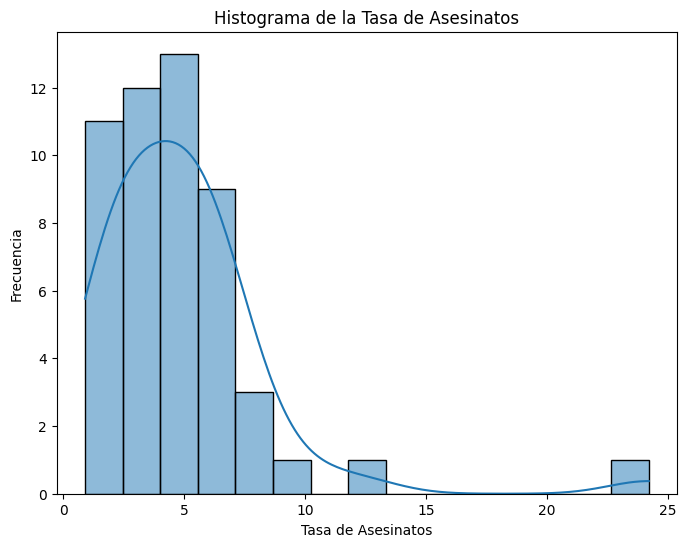

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(dataset['murder'], bins=15, kde=True)
plt.title('Histograma de la Tasa de Asesinatos')
plt.xlabel('Tasa de Asesinatos')
plt.ylabel('Frecuencia')
plt.show()


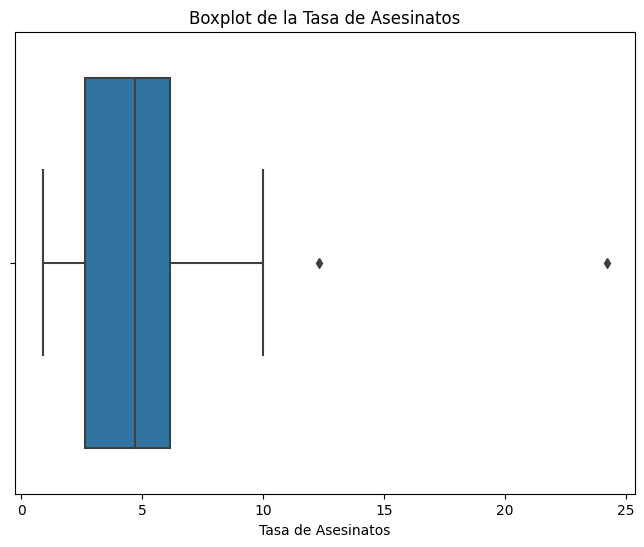

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['murder'])
plt.title('Boxplot de la Tasa de Asesinatos')
plt.xlabel('Tasa de Asesinatos')
plt.show()


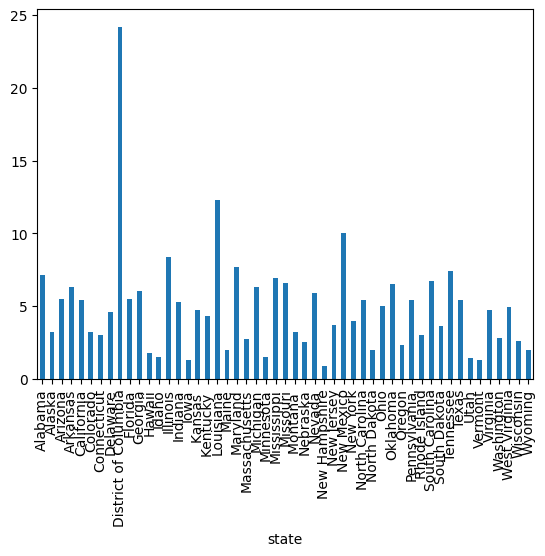

In [64]:
dataset["murder"].plot(kind = "bar")
dataset2 = dataset.drop("District of Columbia")

<Axes: xlabel='state'>

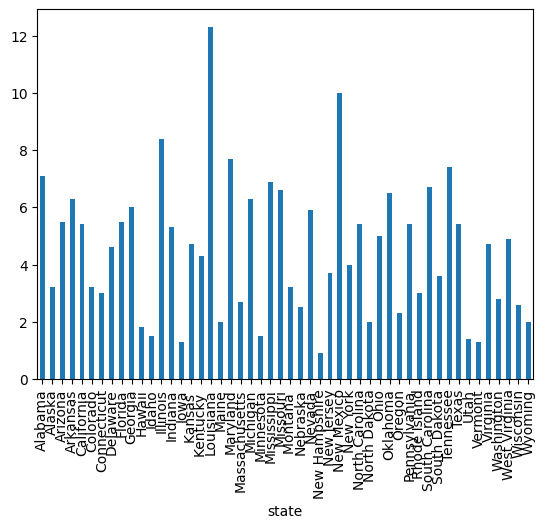

In [68]:
dataset2["murder"].plot(kind = "bar")

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


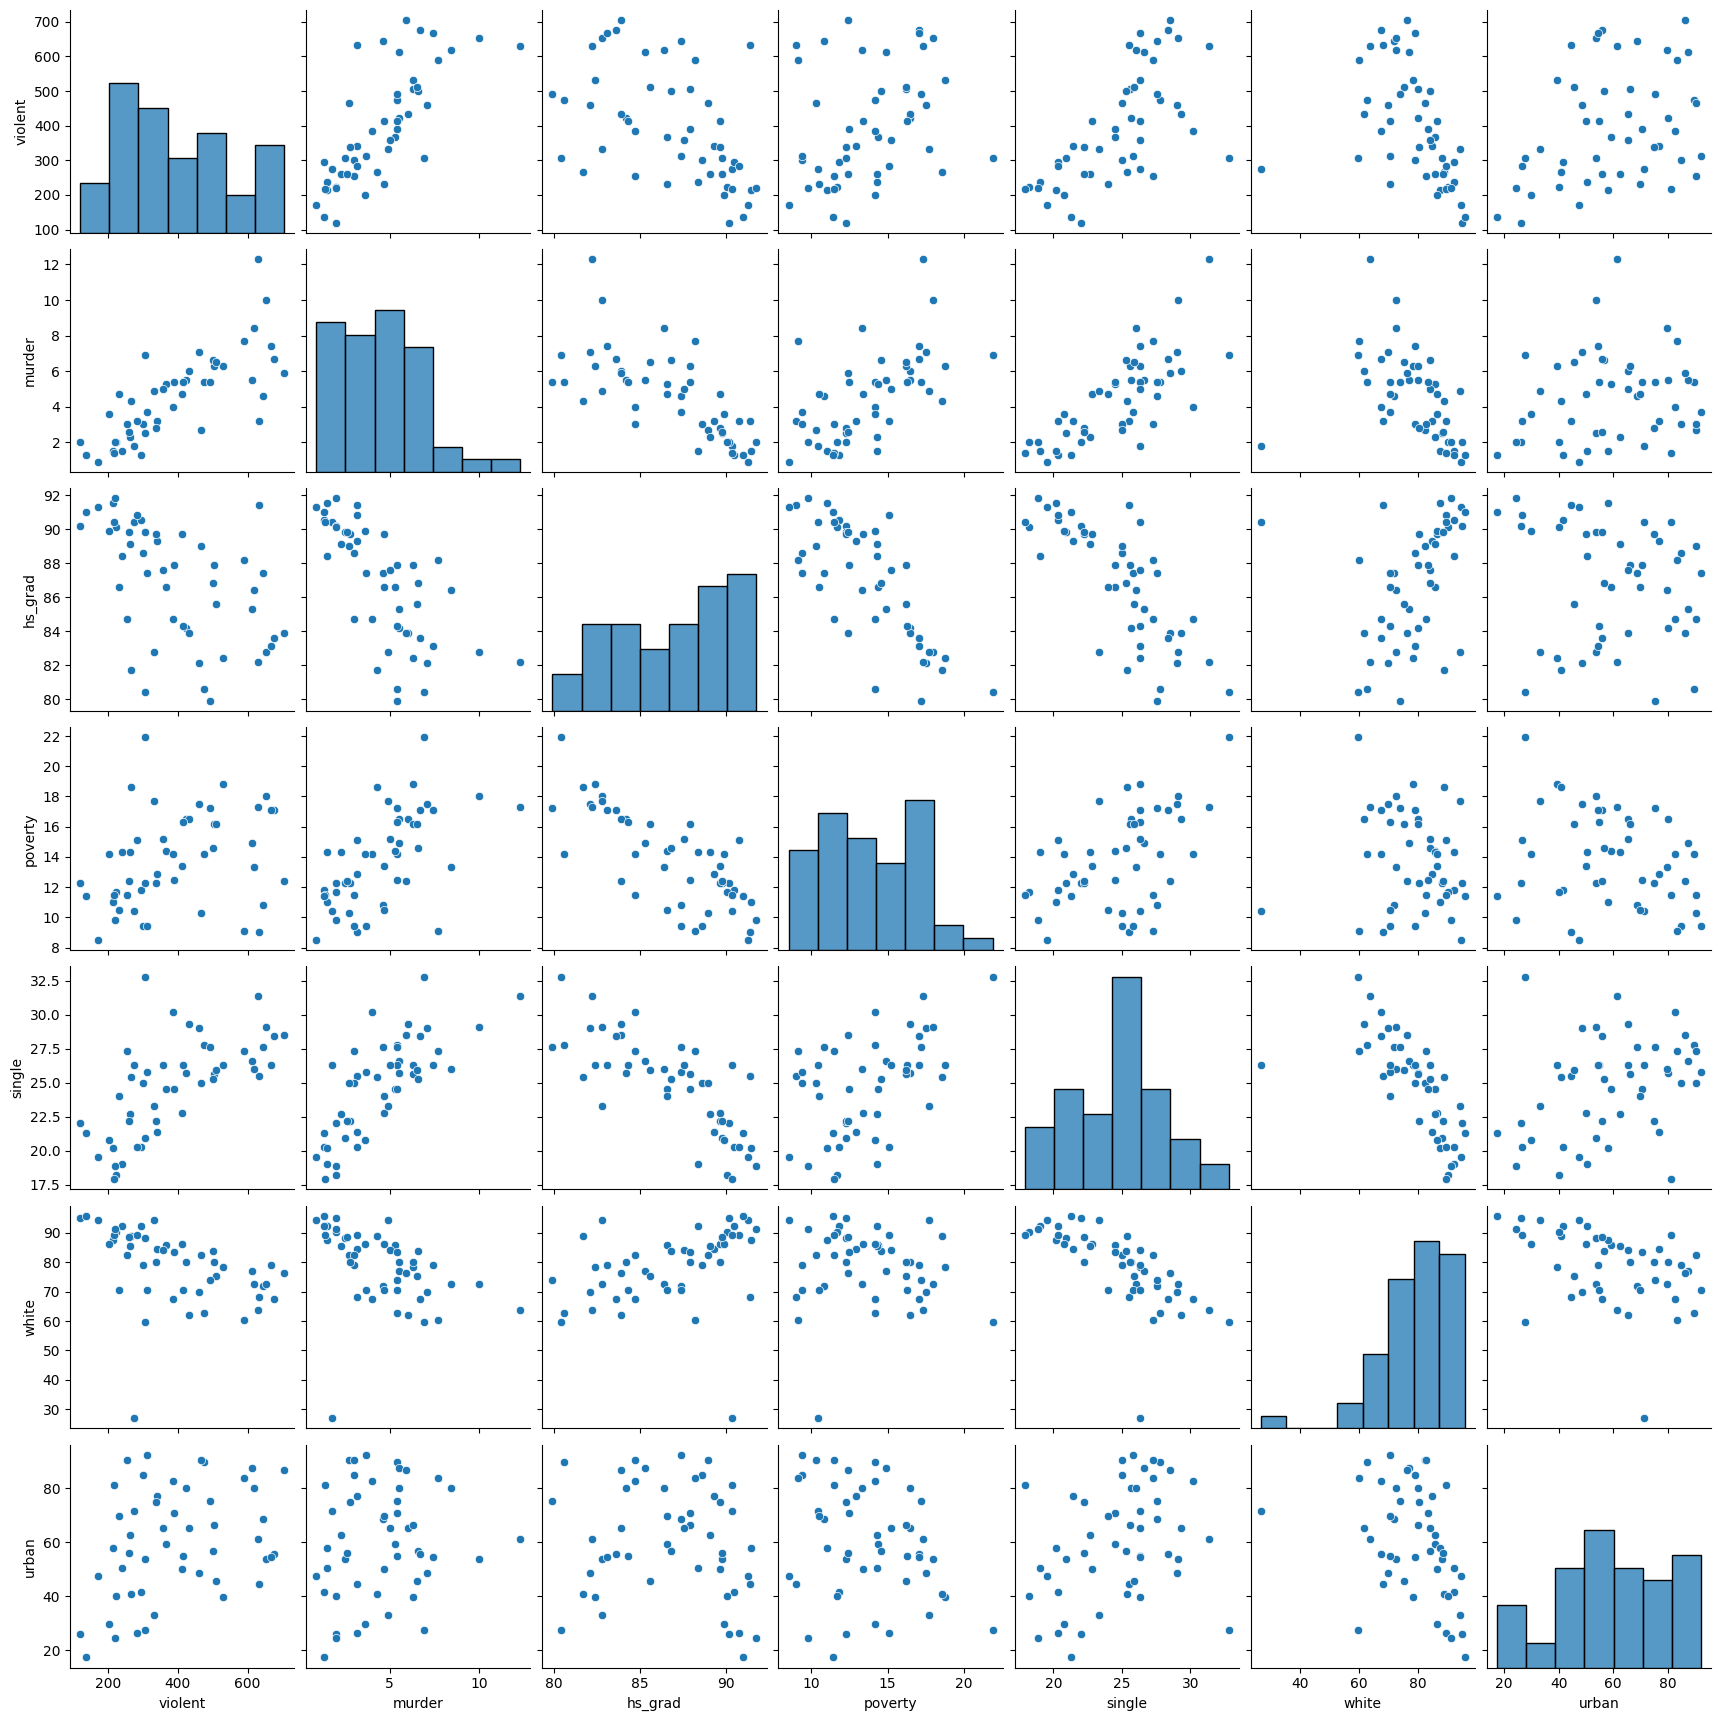

In [69]:
sns.pairplot(dataset2)


### Inferencia estadística con Scipy

#### Pruebas de normalidad

Las **pruebas de normalidad** son una herramienta estadística que se utiliza para verificar si los datos de una muestra siguen una distribución normal. La interpretación de los resultados de las pruebas de normalidad se basa en el valor p. Si el valor p es menor que el nivel de significancia (generalmente 0.05), se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal. Si el valor p es mayor que el nivel de significancia, no se rechaza la hipótesis nula y se asume que los datos siguen una distribución normal. La importancia de las pruebas de normalidad radica en que muchos análisis estadísticos se basan en la suposición de que los datos tienen una distribución normal, por lo que es importante verificar esta suposición antes de proceder con el análisis.


##### Shapiro-Wilk

In [70]:
stat, p_value = stats.shapiro(dataset2['murder'])
print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p_value}")


Estadístico de Shapiro-Wilk: 0.9472025036811829, p-valor: 0.02621493674814701


##### Kolmogorov-Smirnov

In [72]:
stat, p_value = stats.kstest(dataset2['murder'], 'norm')
print(f"Estadístico de Kolmogorov-Smirnov: {stat}, p-valor: {p_value}")


Estadístico de Kolmogorov-Smirnov: 0.8831995154143897, p-valor: 4.892743274356691e-47


La prueba de **Kolmogorov-Smirnov** se utiliza para decidir si los datos de una determinada muestra se ajustan a una distribución de probabilidad. Esta prueba es útil cuando se trabaja con dos muestras procedentes de dos poblaciones que son diferentes. También se puede utilizar para evaluar qué distribución se adapta mejor a los datos.

Por otro lado, la prueba de **Shapiro-Wilk** se utiliza para evaluar la normalidad de los datos en una muestra pequeña o moderada. Es particularmente útil cuando se trabaja con muestras pequeñas, ya que es más robusta que otras pruebas de normalidad.

Por lo tanto, la elección entre la prueba de Kolmogorov-Smirnov y la prueba de Shapiro-Wilk depende del tamaño de la muestra y del propósito del análisis.

#### Pruebas de hipótesis

Las **pruebas de hipótesis** son un método estadístico que se utiliza para tomar decisiones basadas en datos. La interpretación de las pruebas de hipótesis se basa en el valor p. Si el valor p es menor que el nivel de significancia, se rechaza la hipótesis nula y se concluye que hay suficiente evidencia para apoyar la hipótesis alternativa. Si el valor p es mayor que el nivel de significancia, no se rechaza la hipótesis nula. La relevancia de las pruebas de hipótesis radica en que permiten tomar decisiones informadas basadas en datos y pueden ayudar a evitar errores costosos.

Las pruebas de hipótesis evalúan si una afirmación sobre una población parece ser compatible con la evidencia en la muestra.


##### Prueba t de Student
Supongamos que queremos probar si la tasa media de asesinatos es igual a un valor específico, por ejemplo, 4.

In [16]:
mu = 4  # valor específico
stat, p_value = stats.ttest_1samp(dataset['murder'], popmean=mu)
print(f"Estadístico t: {stat}, p-valor: {p_value}")


Estadístico t: 1.762786680173015, p-valor: 0.08404778092958126


##### Prueba de Chi-cuadrado

Puede usarse para probar la independencia entre dos variables categoricas

In [17]:
contingency_table = pd.crosstab(dataset['urban'], dataset['poverty'])
stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Estadístico Chi-cuadrado: {stat}, p-valor: {p_value}")


Estadístico Chi-cuadrado: 1989.0000000000005, p-valor: 0.26400647650378867


#### Intervalos de confianza

Los **intervalos de confianza** son una forma de estimar un parámetro poblacional a partir de una muestra de datos. La interpretación de un intervalo de confianza del 95% es que si se repitiera el estudio muchas veces, el 95% de los intervalos de confianza calculados a partir de estas repeticiones contendrían el verdadero valor del parámetro. Los intervalos de confianza son importantes porque proporcionan una medida de la incertidumbre asociada con la estimación y permiten hacer inferencias sobre la población a partir de los datos de la muestra.

Un intervalo de confianza da un rango estimado de un parámetro de la población.

In [18]:
confidence_level = 0.95
degrees_freedom = len(dataset['murder']) - 1
mean_murder = dataset['murder'].mean()
std_err = stats.sem(dataset['murder'])
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_murder, std_err)
print(f"Intervalo de Confianza: {confidence_interval}")

Intervalo de Confianza: (3.874519594982269, 5.925480405017732)


### Regresión Lineal

La regresión Lineal es un modelo matemático que describe la relación entre varias variables. Los modelos de regresión Lineal son un procedimiento estadísitco que nos permite predecir sobre los valores de la muestra. La tarea de la regresión consiste en predecir un parámetro $y$ a partir de un parametro conocido $x$, su relación más sencilla es la siguiente:

$$y = m x + b$$

#### Construcción del modelo

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


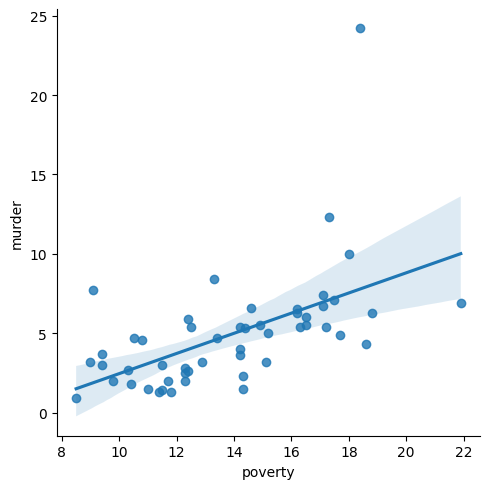

In [89]:
import statsmodels.api as sm

# Definiendo la variable dependiente e independiente
X = dataset['poverty']  # Variable independiente
y = dataset['murder']   # Variable dependiente

# Añadiendo una constante a la variable independiente
X = sm.add_constant(X)

# Ajustando el modelo
model = sm.OLS(y, X).fit()

mod2 = sns.lmplot(x= "poverty",y = "murder", data = dataset)
plt.show()


**Interpretación**

In [20]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     20.36
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           4.03e-05
Time:                        22:47:46   Log-Likelihood:                -128.98
No. Observations:                  51   AIC:                             262.0
Df Residuals:                      49   BIC:                             265.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8989      1.998     -1.952      0.0

#### Diagnóstico a los residuales

In [23]:
# Obteniendo los residuales
residuals = model.resid


**Gráfica de residuales**

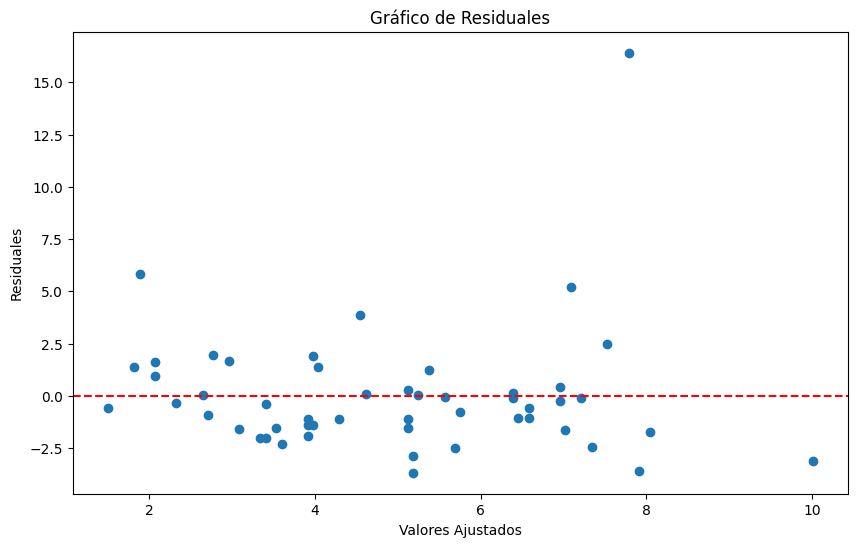

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(y=residuals, x=model.fittedvalues)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuales')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.show()


#### Regresión multiple

Cuando hay múltiples variables independientes involucradas, se puede construir un modelo de regresión múltiple.

$$ y = \beta_0 + \beta_i x_i $$

In [73]:
# Seleccionando más variables independientes
X_multi = dataset[['poverty', 'single', 'hs_grad']]
X_multi = sm.add_constant(X_multi)

# Ajustando el modelo múltiple
model_multi = sm.OLS(y, X_multi).fit()

# Interpretación de Resultados
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     67.32
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           4.86e-17
Time:                        23:07:31   Log-Likelihood:                -95.326
No. Observations:                  51   AIC:                             198.7
Df Residuals:                      47   BIC:                             206.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.6531     10.999     -3.696      0.0

Los coeficientes son los valores que multiplican a las variables independientes en la ecuación de la regresión lineal. El término constante (o intercepto) es el valor de la variable dependiente cuando todas las variables independientes son cero

### Supuestos de la regresión Lineal

Los supuestos clave de la regresión lineal incluyen la linealidad de la relación entre las variables, la independencia de los errores, la ausencia de multicolinealidad, y que los residuos sigan una distribución normal con media cero y varianza constante.

#### Linealidad

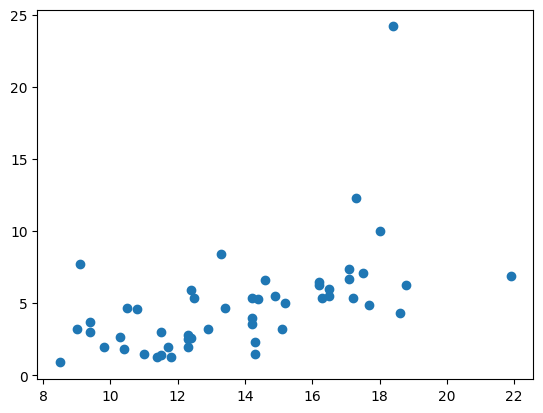

In [76]:
plt.scatter(dataset["poverty"], dataset["murder"])

#### Normalidad de los residuales:

Un gráfico Q-Q (o gráfico cuantil-cuantil) es un método gráfico para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución usada para la comparación

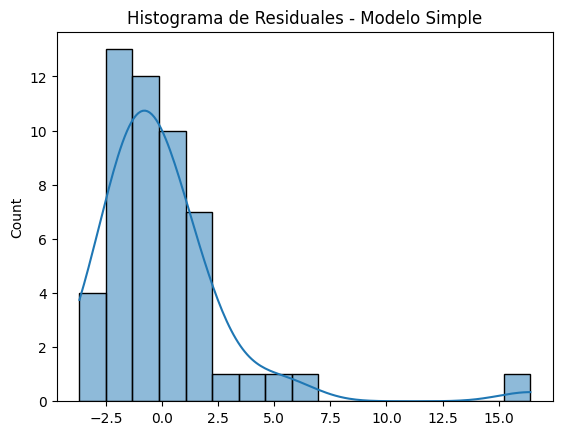

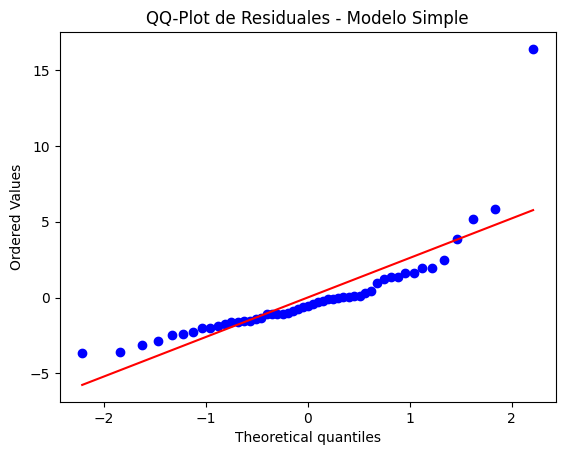

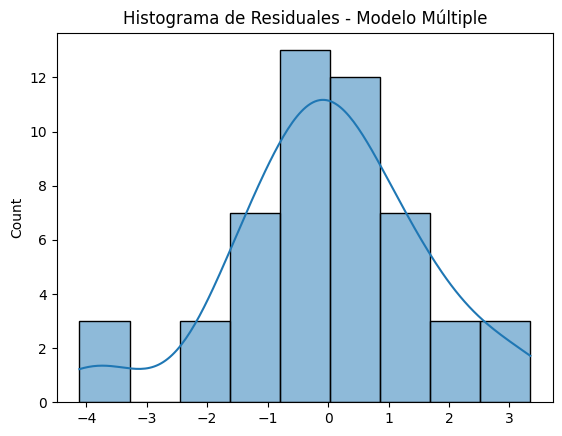

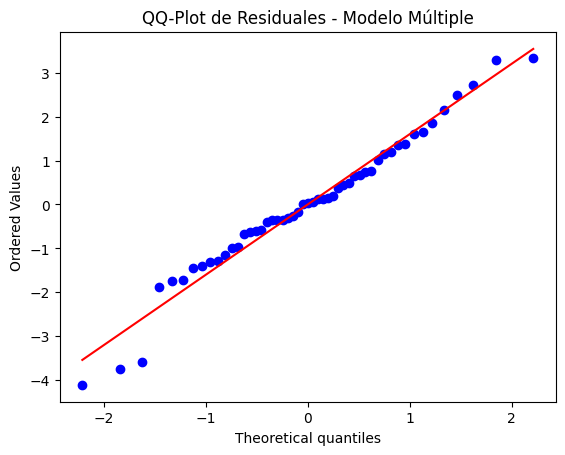

In [80]:
# Modelo Simple
residuals_simple = model.resid
sns.histplot(residuals_simple, kde=True)
plt.title('Histograma de Residuales - Modelo Simple')
plt.show()

stats.probplot(residuals_simple, plot=plt)
plt.title('QQ-Plot de Residuales - Modelo Simple')
plt.show()

# Modelo Múltiple
residuals_multi = model_multi.resid
sns.histplot(residuals_multi, kde=True)
plt.title('Histograma de Residuales - Modelo Múltiple')
plt.show()

stats.probplot(residuals_multi, plot = plt)
plt.title('QQ-Plot de Residuales - Modelo Múltiple')
plt.show()


Otra forma de verificar normalidad de los errores es corriendo el test de shapiro-wilk

In [87]:
stat, p_value = stats.shapiro(residuals_simple)
print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p_value}")

Estadístico de Shapiro-Wilk: 0.7110062837600708, p-valor: 1.0427491758946417e-08


#### Homocedasticidad
La varianza de los residuales debe ser constante en todos los niveles de la variable independiente, verificado mediante el gráfico de residuales

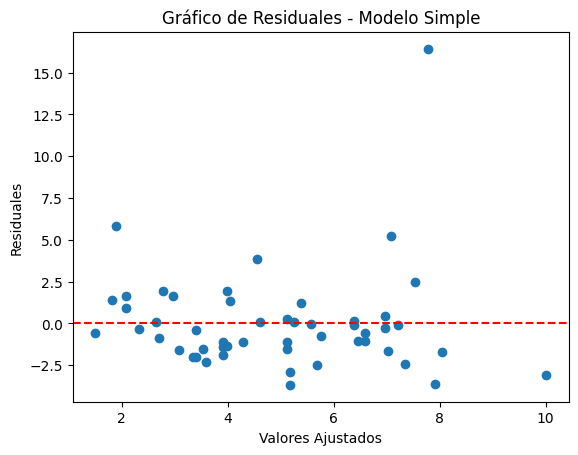

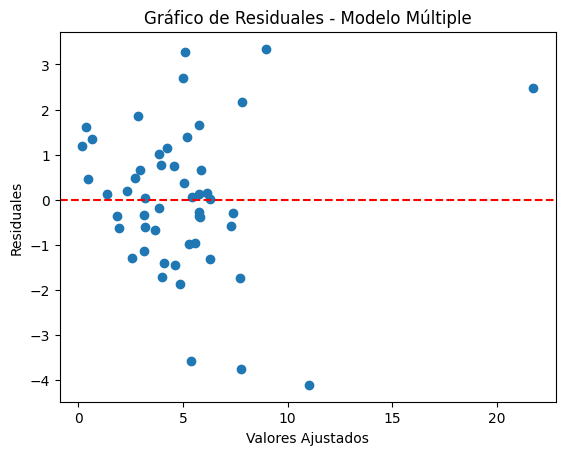

In [81]:
# Modelo Simple
plt.scatter(model.fittedvalues, residuals_simple)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuales - Modelo Simple')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.show()

# Modelo Múltiple
plt.scatter(model_multi.fittedvalues, residuals_multi)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuales - Modelo Múltiple')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.show()


#### Multicolinealidad

Las variables independientes no deben estar altamente correlacionadas entre sí, verificado mediante el factor de inflación de la varianza (VIF). Un VIF superior a 5-10 sugiere multicolinealidad.


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelo Múltiple
vif_data = pd.DataFrame()
vif_data["Variable"] = X_multi.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi.values, i) for i in range(X_multi.shape[1])]
print(vif_data)


  Variable          VIF
0    const  2310.911147
1  poverty     2.272349
2   single     1.488511
3  hs_grad     2.510721


#### Independencia de los residuales

Los residuales deben ser independientes entre sí, verificado mediante la prueba de Durbin-Watson. Un valor cercano a 2 sugiere que no hay autocorrelación.

In [82]:
# Modelo Simple
dw_simple = sm.stats.stattools.durbin_watson(residuals_simple)
print(f"Durbin-Watson Estadístico - Modelo Simple: {dw_simple}")

# Modelo Múltiple
dw_multi = sm.stats.stattools.durbin_watson(residuals_multi)
print(f"Durbin-Watson Estadístico - Modelo Múltiple: {dw_multi}")



Durbin-Watson Estadístico - Modelo Simple: 2.086671523015823
Durbin-Watson Estadístico - Modelo Múltiple: 2.534825620898831
